In [203]:
import numpy as np
import pandas as pd
import random

from collections import defaultdict
from typing import Dict, List, Optional, Tuple
import matplotlib.pyplot as plt

import networkx as nx
import time

# Dijkstra and Bellman-Ford

In [204]:
N = 100
M = 500
W = 200

In [205]:
def build_graph():
    m = np.zeros((N, N), dtype=int)

    for _ in range(M):
        while True:
            i = random.randint(0, N - 1)
            j = random.randint(0, N - 1)
            w = random.randint(1, W - 1)
            if i != j and m[i][j] == 0:
                m[i][j] = m[j][i] = w
                break
                
    g = nx.from_numpy_matrix(np.matrix(m), create_using=nx.DiGraph)
    return g

In [206]:
def draw_graph(graph, color_nodes: List[int] = [], draw_weights: bool = True):
    layout = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(15,8))
    nx.draw(graph, layout, with_labels=True, font_color="white")

    node_colors = ["red" if n in color_nodes else "blue" for n in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos=layout, node_color=node_colors)

    if draw_weights:
        labels = nx.get_edge_attributes(graph,'weight')
        nx.draw_networkx_edge_labels(graph, pos=layout, edge_labels=labels)
    plt.show() 

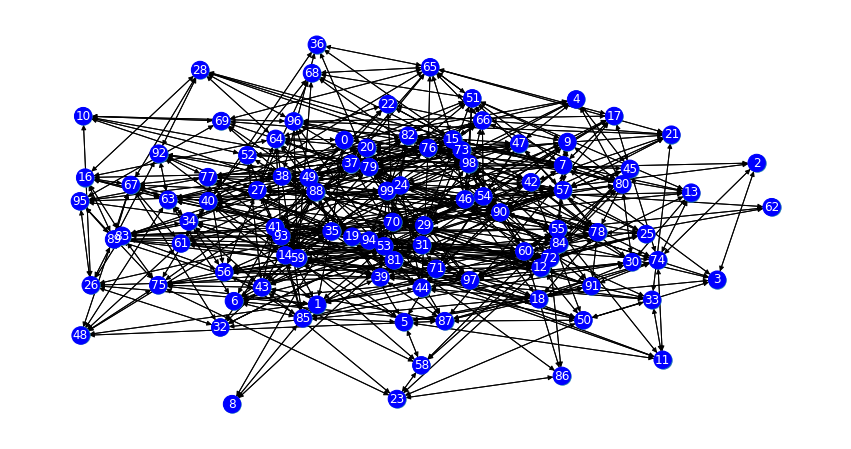

In [207]:
g = build_graph()
draw_graph(g, draw_weights=False)

In [208]:
def generate_ab():
    while True:
        a = random.randint(0, N - 1)
        b = random.randint(0, N - 1)
        if a != b:
            return a, b

def run_dijkstra(g, a, b):
    start = time.time_ns()
    p = nx.dijkstra_path(g, a, b)
    finish = time.time_ns()
    return p, finish - start

def run_bellman_ford(g, a, b):
    start = time.time_ns()
    p = nx.bellman_ford_path(g, a, b)
    finish = time.time_ns()
    return p, finish - start

In [209]:
P, T0, T1 = [], [], []
for i in range(5):
    a, b = generate_ab()
    T0.append([])
    T1.append([])
    for j in range(10):
        p0, t0 = run_dijkstra(g, a, b)
        p1, t1 = run_bellman_ford(g, a, b)
        
        assert p0 == p1
        if j == 0:
            P.append(p0)
            
        T0[i].append(t0)
        T1[i].append(t1)

In [210]:
df = pd.DataFrame.from_dict({
    'Path length': map(len, P),
    'Dijkstra time [ns]': map(np.average, T0),
    'Bellman-Ford time [ns]': map(np.average, T1)
})
df

,Path length,Dijkstra time [ns],Bellman-Ford time [ns]
0,3,88200.0,1411900.0
1,5,405600.0,1551700.0
2,5,113500.0,1222300.0
3,5,386000.0,1281400.0
4,5,321900.0,1222500.0


In [211]:
df.describe().astype('int32')

,Path length,Dijkstra time [ns],Bellman-Ford time [ns]
count,5,5,5
mean,4,263040,1337960
std,0,151524,142354
min,3,88200,1222300
25%,5,113500,1222500
50%,5,321900,1281400
75%,5,386000,1411900
max,5,405600,1551700


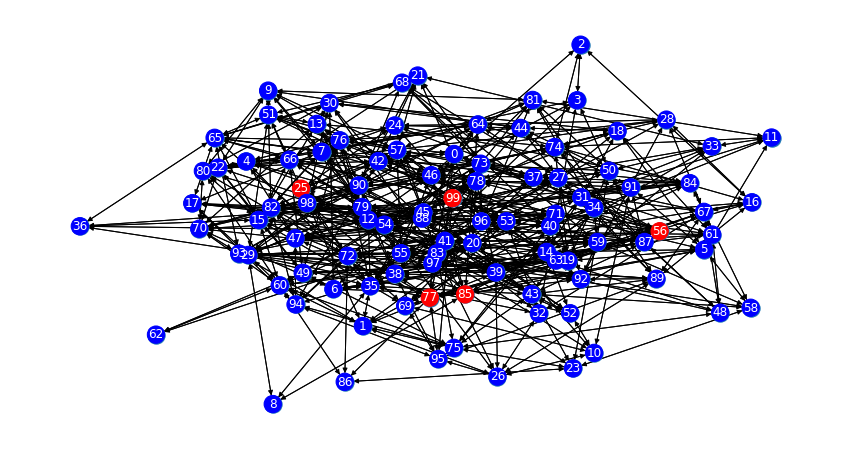

In [212]:
draw_graph(g, P[3], draw_weights=False)

# A*

In [228]:
N = 10
M = 20
K = 40

In [229]:
def build_grid():
    grid = nx.grid_2d_graph(N, M)
    for _ in range(K):
        while True:
            i = random.randint(0, N - 1)
            j = random.randint(0, M - 1)
            if (i, j) in grid.nodes():
                grid.remove_node((i, j))
                break
    return grid

In [230]:
def draw_grid(grid, color_nodes: List[int] = []):
    plt.figure(figsize=(M, N))
    pos = {(x, y): (y, -x) for x, y in grid.nodes()}
    nx.draw(grid, pos=pos, node_size=600)

    colors = ["red" if n in color_nodes else "blue" for n in grid.nodes()]
    nx.draw_networkx_nodes(grid, pos=pos, node_color=colors, node_size=600)

    plt.show()

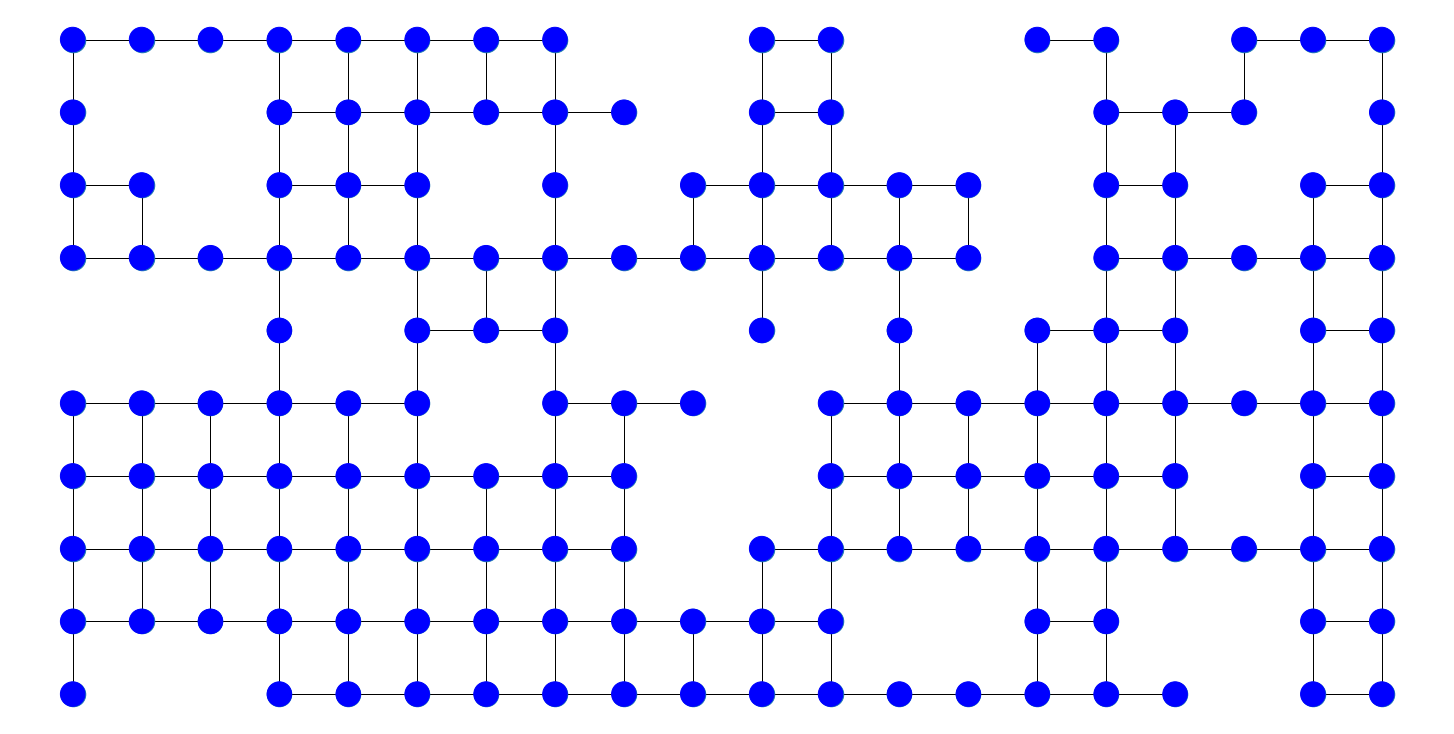

In [235]:
g = build_grid()
draw_grid(g)

In [236]:
def generate_ab(grid):
    while True:
        a = (random.randint(0, N - 1), random.randint(0, M - 1))
        b = (random.randint(0, N - 1), random.randint(0, M - 1))
        if a != b and a in grid.nodes() and b in grid.nodes():
            return a, b
        
def run_astar(grid, a, b):
    start = time.time_ns()
    p = nx.astar_path(grid, a, b)
    finish = time.time_ns()
    return p, finish - start

In [237]:
P, T = [], []
for i in range(5):
    a, b = generate_ab(g)
    T.append([])
    for j in range(10):
        p, t = run_astar(g, a, b)
        if j == 0:
            P.append(p)
        T[i].append(t)

In [238]:
df = pd.DataFrame.from_dict({
    'Path length': map(len, P),
    'A* time [ns]': map(np.average, T)
})
df

,Path length,A* time [ns]
0,14,729100.0
1,13,646100.0
2,18,1111000.0
3,19,1241000.0
4,20,919800.0


In [239]:
df.describe().astype('int32')

,Path length,A* time [ns]
count,5,5
mean,16,929400
std,3,250271
min,13,646100
25%,14,729100
50%,18,919800
75%,19,1111000
max,20,1241000


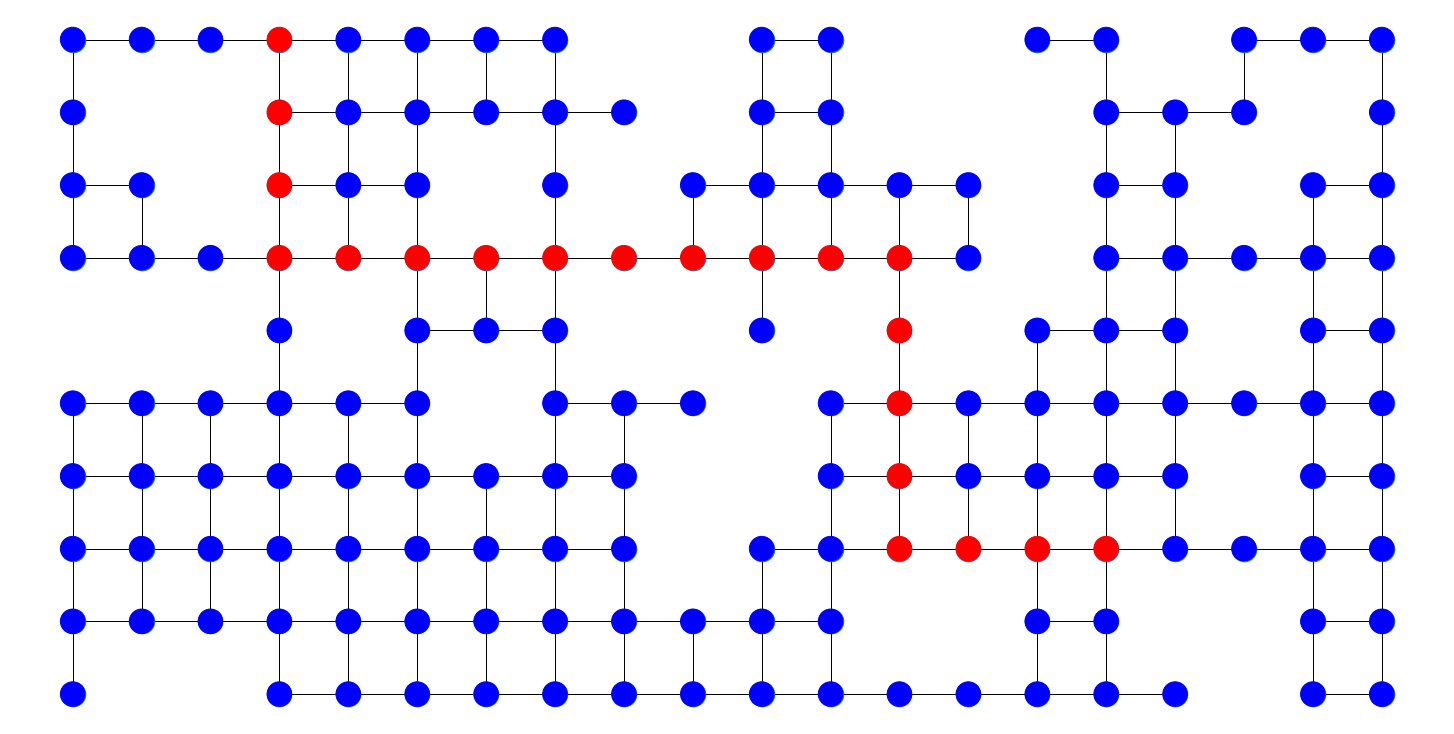

In [243]:
draw_grid(g, P[4])